**Chapter 1 – The Machine Learning landscape**

_This is the code used to generate some of the figures in chapter 1._

GDP与人民生活满意度的关系-数据处理：通过观察GDP与生活满意度这两个指标来观察金钱与快乐之间的关系

基本环境导入：

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

合并生活满意度和GDP数据的函数：

In [3]:
# def prepare_country_stats(oecd_bli, gdp_per_capita):
#     oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
#     oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#     gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
#     gdp_per_capita.set_index("Country", inplace=True)
#     full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
#                                   left_index=True, right_index=True)
#     full_country_stats.sort_values(by="GDP per capita", inplace=True)
#     remove_indices = [0, 1, 6, 8, 33, 34, 35]
#     keep_indices = list(set(range(36)) - set(remove_indices))
#     return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

从网络上下载数据集：

In [4]:
# import os
# datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# # Download the data
# import urllib
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# os.makedirs(datapath, exist_ok=True)
# for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
#     print("Downloading", filename)
#     url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
#     urllib.request.urlretrieve(url, datapath + filename)

In [6]:
# oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
# gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
#                              encoding='latin1', na_values="n/a")


# # Prepare the data
# country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
# X = np.c_[country_stats["GDP per capita"]]
# y = np.c_[country_stats["Life satisfaction"]]

# # Visualize the data
# country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
# plt.show()

# # Select a linear model
# model = sklearn.linear_model.LinearRegression()

# # Train the model
# model.fit(X, y)

# # Make a prediction for Cyprus
# X_new = [[22587]]  # Cyprus' GDP per capita
# print(model.predict(X_new)) # outputs [[ 5.96242338]]

导入库并设置图片显示格式：

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

加载数据：

In [8]:
oecd_bli = pd.read_csv("./datasets/lifesat/oecd_bli_2015.csv", thousands=',') #千分位分隔符

gdp_per_capita = pd.read_csv("./datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

查看数据前五行：

In [9]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


查看数据基本信息：

In [10]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
LOCATION                 3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 437.3+ KB


查询每一个元素的个数：

In [11]:
oecd_bli['Inequality'].value_counts()

Total    888
Women    881
Men      881
High     328
Low      314
Name: Inequality, dtype: int64

In [12]:
oecd_bli['INEQUALITY'].value_counts()

TOT    888
WMN    881
MN     881
HGH    328
LW     314
Name: INEQUALITY, dtype: int64

所有人对应TOT，所以先将这部分数据筛选出来：

In [13]:
oecd_bli=oecd_bli[oecd_bli['INEQUALITY']=='TOT']
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


为了正常查看数据的值，需要重新设置行名(index),列名(columns)以及对应的值：

In [14]:
oecd_bli=oecd_bli.pivot(index='Country',columns='Indicator',values='Value')
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [15]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [16]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


将名称为2015的列改为GDP per capita

In [17]:
gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True) #若不加inplace=true，则原表格不会改变

将国家名称作为索引：

In [18]:
gdp_per_capita.set_index("Country",inplace=True)

In [19]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


将两个表根据国家名合并:

In [20]:
full_country_stats=pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


按照GDP per capita由低到高排序：

In [21]:
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [22]:
full_country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Brazil to Luxembourg
Data columns (total 30 columns):
Air pollution                                36 non-null float64
Assault rate                                 36 non-null float64
Consultation on rule-making                  36 non-null float64
Dwellings without basic facilities           36 non-null float64
Educational attainment                       36 non-null float64
Employees working very long hours            36 non-null float64
Employment rate                              36 non-null float64
Homicide rate                                36 non-null float64
Household net adjusted disposable income     36 non-null float64
Household net financial wealth               36 non-null float64
Housing expenditure                          36 non-null float64
Job security                                 36 non-null float64
Life expectancy                              36 non-null float64
Life satisfaction                           

抽出需要的两列：(两张表的国家可能不完全重合，所以先合并再抽取)

In [23]:
country_stats = full_country_stats[["GDP per capita","Life satisfaction"]]
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


数据分布可视化：

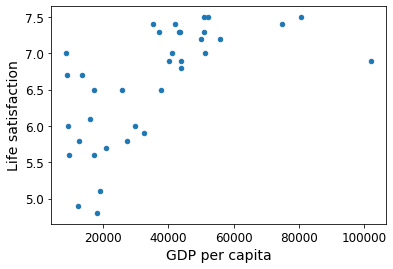

In [24]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

保存数据(默认为同文件夹下)

In [25]:
# country_stats.to_csv('country_stats.csv')

删除异常值：

In [26]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [27]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


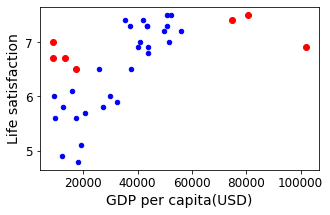

In [28]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), c='b')
pos_data_x=missing_data["GDP per capita"]
pos_data_y=missing_data["Life satisfaction"]
plt.plot(pos_data_x,pos_data_y,'ro') #表示红色圆圈
plt.xlabel("GDP per capita(USD)")
plt.show()

观察删除异常值之后的数据分布，似乎呈现线性分布

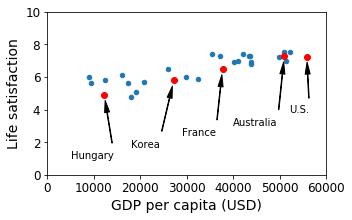

In [29]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]   #取出对应的坐标值
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,  #文字标注的位置
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
    
plt.xlabel("GDP per capita (USD)")
plt.show()

可以观察到似乎呈现直线趋势,先画一些线进行尝试：

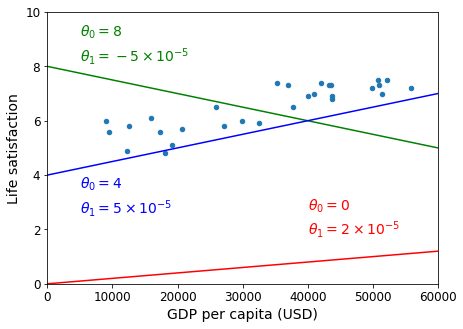

In [30]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(7,5))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")  #类似于latex的语法
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

线形模型的训练：使用LinearRegression做线性回归

设置x,y

In [31]:
X = np.c_[sample_data["GDP per capita"]]
y = np.c_[sample_data["Life satisfaction"]]

选择一个线形模型：

In [32]:
model=sklearn.linear_model.LinearRegression()

训练模型：

In [33]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

获取最优拟合直线的截距与斜率

In [34]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

进行预测：

In [35]:
X_new=[[22587]]
print(model.predict(X_new))

[[5.96242338]]


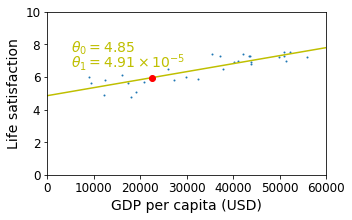

In [36]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")

#画出最优拟合直线
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "y")

plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="y")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="y")

plt.plot(X_new, model.predict(X_new), "ro")

plt.show()

如果不删除异常值，得到的模型为：

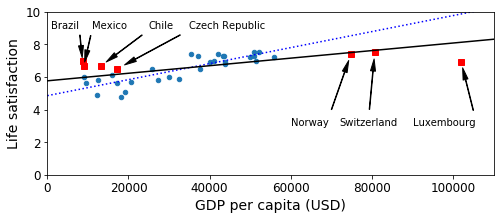

In [37]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")   #冒号代表虚线

lin_reg_full = sklearn.linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

plt.show()

可以看出删去红色点后得到的直线（蓝色虚线）适用性更好。

# 过拟合

如果使用PolynomialFeatures来进行多项式拟合，例如有a,b两个特征，那么其2次多项式为1,a,b,a^2,ab,b^2

degree:控制多项式的度

interaction_only:默认False，若设为True，则不含a^2,b^2等特征自己和自己结合的项

include_bias:默认为True，即包含1这一项

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


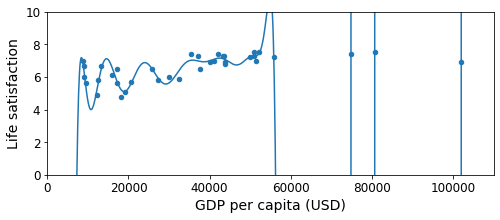

In [38]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

#先用poly把数据集升维到60，然后对数据标准化，最后线性回归，pipeline就是把这三步联合到一起，提高效率
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])

full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0,110000,0,10])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

可以看出，模拟的模型穿过了数据的大多数的点，然而我们并不能用这个模型去预测数据，这种现象就是过拟合。

# 对比其他模型：k临近算法模型

使用sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)模型

In [39]:
#导入
import sklearn.neighbors
model_k = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

#训练
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

model_k.fit(X, y)

# Make a prediction for Cyprus
X_new_k = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model_k.predict(X_new_k)) # outputs [[ 5.76666667]]

[[5.76666667]]


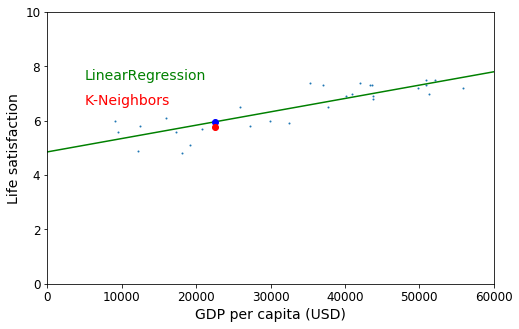

In [40]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5), s=1)
plt.xlabel("GDP per capita (USD)")

#画出最优拟合直线
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "g")

plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, "LinearRegression", fontsize=14, color="g")
plt.text(5000, 6.6, "K-Neighbors", fontsize=14, color="r")

plt.plot(X_new, model.predict(X_new), "bo")
plt.plot(X_new_k, model_k.predict(X_new_k), "ro")

plt.show()

用于保存图片的函数:

In [41]:
# Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "fundamentals"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

Make this notebook's output stable across runs:

In [42]:
# np.random.seed(42)

python使用命令行

In [43]:
# sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

# 总结

## 1.感觉需要加强一下python在数据处理和命令行方面的应用。

## 2.理论部分也需要同时跟进